In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
 df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.shape)

(10000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
X_train.shape

(8000, 11)

In [18]:
X_test.shape

(2000, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model= Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7844 - loss: 0.5781 - val_accuracy: 0.7956 - val_loss: 0.4819
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8106 - loss: 0.4580 - val_accuracy: 0.8031 - val_loss: 0.4441
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8285 - loss: 0.4229 - val_accuracy: 0.8087 - val_loss: 0.4277
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8252 - loss: 0.4084 - val_accuracy: 0.8175 - val_loss: 0.4141
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.4056 - val_accuracy: 0.8219 - val_loss: 0.4000
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.3911 - val_accuracy: 0.8338 - val_loss: 0.3875
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.3937 - val_accuracy: 0.8419 - val_loss: 0.3755
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.3840 - val_accu

In [27]:
model.layers[0].get_weights()

[array([[-1.15252741e-01, -1.11508667e-01, -1.38405114e-02,
         -4.01976317e-01,  1.28597215e-01, -1.77807242e-01,
          4.98841822e-01, -8.81334767e-02, -5.68408251e-01,
         -3.96514833e-01,  1.74612179e-01],
        [-2.04646096e-01, -4.73862253e-02, -1.24505192e-01,
         -3.21715146e-01,  5.73582649e-01, -6.46939993e-01,
         -4.80850786e-01,  4.63874787e-01,  9.32454050e-01,
          5.92725754e-01, -5.40760994e-01],
        [ 4.41570908e-01, -9.17231664e-02,  3.14793915e-01,
          2.29523867e-01,  1.53447568e-01, -2.29277126e-02,
         -2.99246848e-01,  1.37504146e-01,  4.67571318e-01,
         -2.80229658e-01,  1.39893502e-01],
        [-1.29244477e-01,  1.55996615e-02, -8.64636838e-01,
          3.37827802e-01,  4.86983806e-02,  4.79726762e-01,
          1.14898942e-01,  2.57522374e-01, -2.88299590e-01,
         -2.78269742e-02, -3.06456596e-01],
        [ 2.39016488e-01,  8.45563650e-01, -8.11754704e-01,
         -6.66007698e-02, -7.29677379e-01, -

In [28]:
model.layers[1].get_weights()

[array([[ 0.66977   ,  0.25198683, -0.45686203,  0.26515168, -0.45643023,
          0.2705397 ,  0.07674941, -0.04642345, -0.18882923, -0.20130767,
         -0.05270596],
        [ 0.42213783, -0.28837064, -0.5060992 , -0.46438137,  0.5991965 ,
          0.3812113 ,  0.19948411, -0.9068909 , -0.48492092,  0.5073219 ,
          0.32411548],
        [-0.33925506,  0.11529627,  0.27256536, -0.17204699, -0.7538236 ,
          0.0849256 ,  0.19458525, -0.31727824, -1.0114017 , -0.14821087,
          0.06601129],
        [ 0.09854454,  0.3077209 ,  0.0198373 ,  0.20666973, -0.30270407,
          0.22328039,  0.24614295,  0.06694093, -0.7016746 , -0.00936386,
          0.12638204],
        [-0.21900748,  0.4123998 ,  0.53653944,  0.34977776, -0.28951865,
         -0.52070105, -0.39437577, -0.10997454,  0.44999865, -0.01490063,
         -0.22951855],
        [-0.17338291, -0.34123144,  0.23264247,  0.23918672,  0.3976408 ,
          0.5434614 ,  0.5828789 , -0.32913437, -0.8371644 , -0.0068125

In [29]:
model.layers[2].get_weights()

[array([[-0.34586975],
        [ 0.9697631 ],
        [ 0.9170174 ],
        [-0.32063058],
        [ 0.9081585 ],
        [-0.6038131 ],
        [ 1.062876  ],
        [-0.50759405],
        [-1.4257901 ],
        [-0.57269734],
        [-1.0145624 ]], dtype=float32),
 array([-0.18071088], dtype=float32)]

In [30]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
y_pred= np.where(y_log>0.5,1,0)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862

In [33]:
import matplotlib.pyplot as plt

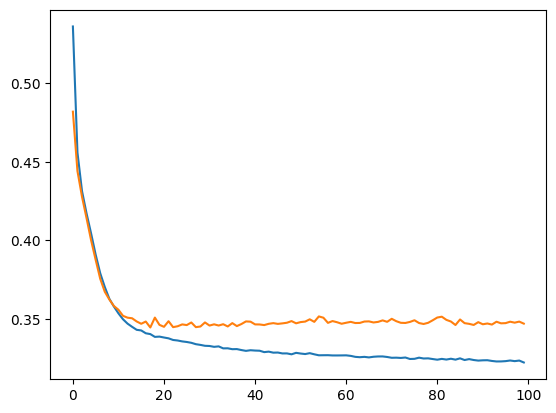

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

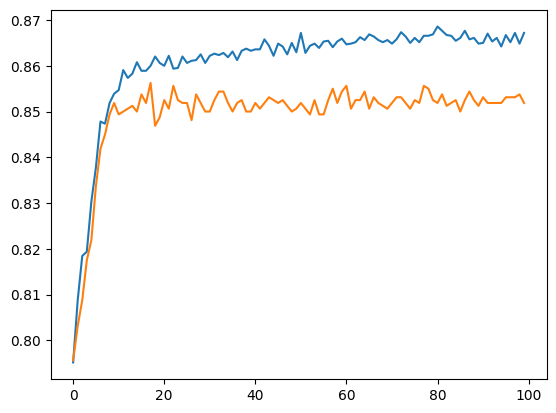

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])